# Is Global Warming a Thing?

#### This is an attempt  to find comparisons between the assumption that global warming is real or not.
#### To decide, you'll conduct a study on a 200-year trend from 1813-2013. These samples should be sufficient enough to determine the validity of Global Warming.

<strong>Note</strong>: to complete this data report, you will need to calculate moving average of weather over a period of 200 years. Click <a href="https://www.portent.com/blog/analytics/rolling-averages-math-moron.htm">here</a> to learn how to calculate moving averages.

<strong>Moving averages are also known as rolling averages</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Retrieving Data

In [2]:
df_global = pd.read_csv('weather_global.csv')
df_chicago = pd.read_csv('weather_chicago.csv')

In [3]:
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
df_chicago.head()

,year,city,country,avg_temp
0,1743,Chicago,United States,5.44
1,1744,Chicago,United States,11.73
2,1745,Chicago,United States,1.80
3,1746,Chicago,United States,NaN
4,1747,Chicago,United States,NaN


## Clean Data

#### Drop 'city' and 'country' columns

In [5]:
df_chicago.drop(['city', 'country'], axis=1, inplace=True)

#### Check for null values

In [6]:
df_chicago.isnull()

,year,avg_temp
0,False,False
1,False,False
2,False,False
3,False,True
4,False,True
...,...,...
266,False,False
267,False,False
268,False,False
269,False,False


#### Remove null values

In [7]:
df_chicago.dropna(inplace=True)

In [8]:
df_chicago.head(10)

,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
7,1750,10.49
8,1751,11.19
9,1752,4.50
10,1753,10.04
11,1754,10.64
12,1755,7.41
13,1756,11.15


#### Convert all temps to Fahrenheit

In [9]:
df_chicago.avg_temp = df_chicago.avg_temp.apply(lambda temp: round(temp * (9/5)+ 32, 2)) 
df_global.avg_temp = df_global.avg_temp.apply(lambda temp: round(temp * (9/5)+ 32, 2)) 

In [10]:
df_chicago

,year,avg_temp
0,1743,41.79
1,1744,53.11
2,1745,35.24
7,1750,50.88
8,1751,52.14
...,...,...
266,2009,50.54
267,2010,53.28
268,2011,52.18
269,2012,55.08


In [11]:
df_global

,year,avg_temp
0,1750,47.70
1,1751,46.36
2,1752,42.40
3,1753,47.10
4,1754,47.25
...,...,...
261,2011,49.14
262,2012,49.12
263,2013,49.30
264,2014,49.23


#### Trim results to same time period

In [12]:
df_chicago = df_chicago.query('year >= 1764 and year <= 2013')
df_global = df_global.query('year >= 1764 and year <= 2013')

In [13]:
df_chicago

,year,avg_temp
21,1764,51.13
22,1765,49.60
23,1766,50.88
24,1767,48.94
25,1768,48.11
...,...,...
266,2009,50.54
267,2010,53.28
268,2011,52.18
269,2012,55.08


In [14]:
df_global

,year,avg_temp
14,1764,47.12
15,1765,46.85
16,1766,47.14
17,1767,46.80
18,1768,44.20
...,...,...
259,2009,49.12
260,2010,49.46
261,2011,49.14
262,2012,49.12


#### Save to new CSVs

In [15]:
df_global.reset_index(drop=True, inplace=True)
df_global.to_csv('clean_glo.csv')

In [16]:
df_chicago.reset_index(drop=True, inplace=True)
df_chicago.to_csv('clean_chi.csv')

## Global 50-year moving average

#### Calculated 50-year moving average starting from 1764. First calculated average starts at 1813

In [17]:
# DON'T RUN THIS CELL
# THESE ARE THE NUMBERS YOU SHOULD BE GETTING

#### Create a new column that holds rolling averages

In [18]:
df_chicago.avg_temp.rolling(50).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
245    51.0980
246    51.1596
247    51.1824
248    51.2844
249    51.3456
Name: avg_temp, Length: 250, dtype: float64

In [19]:
# DO NOT RUN THIS CELL! YOU'LL LOSE THE VISUAL REPRESENTATION IF YOU DO!

# Create a graph that plots two scatter plots and compares the global temperature by year (yellow) vs the 
# rolling average by year (green)

In [20]:
df_chicago['ra_50'] = round(df_chicago.avg_temp.rolling(50).mean(), 2)

C:\Users\tstyl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_global['ra_50'] = round(df_global.avg_temp.rolling(50).mean(), 2)

C:\Users\tstyl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_global[df_global.ra_50.notnull()].head()

,year,avg_temp,ra_50
49,1813,45.93,46.69
50,1814,45.66,46.66
51,1815,45.03,46.62
52,1816,44.49,46.57
53,1817,44.56,46.53


In [23]:
year_range = range(1813, 2014, 50)
year_labels = ['1813', '1863', '1913', '1963', '2013']

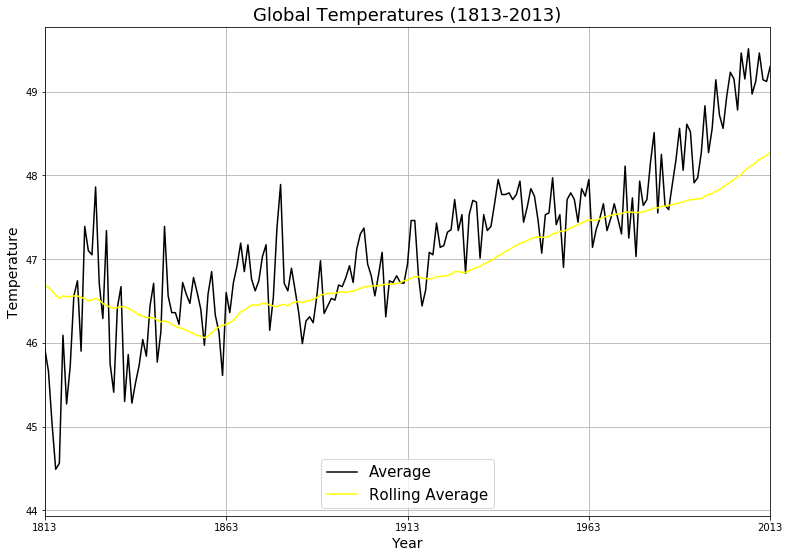

In [32]:
plt.figure(figsize=(13, 9))

plt.plot(df_global.year, df_global.avg_temp, color='black')
plt.plot(df_global.year, df_global.ra_50, color='yellow')
plt.xticks(year_range, year_labels)
plt.xlim(int(year_labels[0]), (int(year_labels[-1])))


plt.title("Global Temperatures (1813-2013)", fontsize = 18)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.grid(True)
plt.legend(['Average', 'Rolling Average'], loc=8, prop={'size': 15});

## Chicago 50-year moving average

#### Calculated 50-year moving average starting from 1764. First calculated average starts at 1813

In [25]:
# DON'T RUN THIS CELL
# THESE ARE THE NUMBERS YOU SHOULD BE GETTING

#### Create new column that holds rolling averages

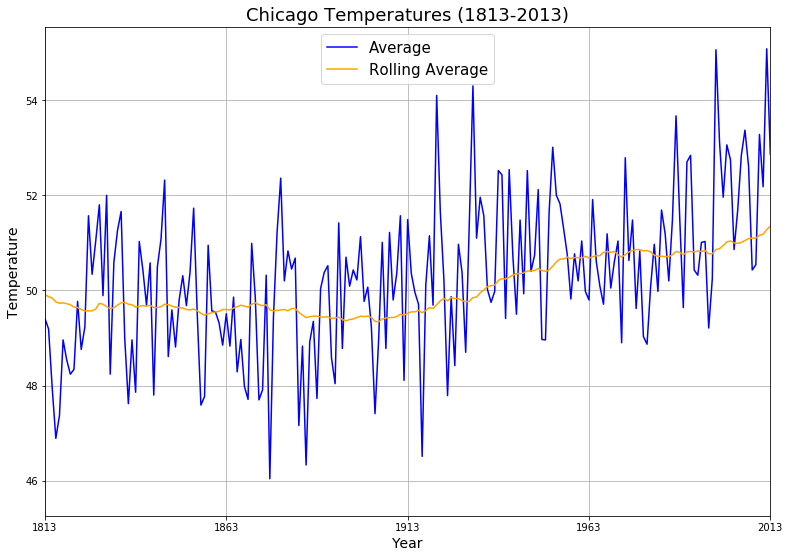

In [36]:
plt.figure(figsize=(13, 9))

plt.plot(df_chicago.year, df_chicago.avg_temp, color='blue')
plt.plot(df_chicago.year, df_chicago.ra_50, color='orange')
plt.xticks(year_range, year_labels)
plt.xlim(int(year_labels[0]), (int(year_labels[-1])))


plt.title("Chicago Temperatures (1813-2013)", fontsize = 18)
plt.ylabel("Temperature", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.grid(True)
plt.legend(['Average', 'Rolling Average'], loc=9, prop={'size': 15});

In [26]:
# DO NOT RUN THIS CELL! YOU'LL LOSE THE VISUAL REPRESENTATION IF YOU DO!

# Create a graph that plots two scatter plots and compares the local temperature (for Chicago) by year (yellow) vs the 
# rolling average by year (green)

## Conclusions
#### 1) Based on our two Data sets, we can conclude that Chicago's Rolling-Average Fluctuates a good deal more than the Global Rolling Average.

#### 2) By looking at years worth of temperature data, we can see that the Global Temperature has been slowly but surely rising overtime, thus we can infer that Global Warming is likely a real Global issue.

#### 3) The graphed Data Sets show that the Chicago Average Temperature gets hotter than the Global Average. (The Global average never quite gets up to 50 degrees, while the Chicago Average has gotten up to nearly 55.)

#### 4) The graphed Global Temperature Set tells me that the Global Average Temperature has not dropped below 45 degrees since the early 1800's, and it doesn't seem to be dropping back in that direction anytime soon.